#### Adaline (Adaptative Linear Neuron)

Adaline is a simple neural model, developed after the MCP Neural model and after Rosenblatt's rule was developed.

![Image that shows Adaline Model](img/adaline.jpeg "Adaline")
<style type="text/css">
    img {
        width: 350px;
    }
</style>

Adaline was the first neural model to use the derivative of a linear function as part of the learning algorithm.

In [1]:
import numpy as np
from numpy.random import RandomState

class Adaline:
    """ADAptive LInear NEuron classifier.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # Learning rate
        self.n_iter = n_iter
        self.w = None
        self.b = None
        self.rgen = RandomState(random_state)
        self.errors = []
    
    def predict(self, X):
        z = self.net_input(X)
        y = self.activation(z)
        return np.where(y >= 0.5, 1, 0)

    def net_input(self, X):
        return np.dot(X, self.w) + self.b    

    def activation(self, X):
        return X    

    def fit(self, X, y_true):
        if self.w is None:
            self.w = self.rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
            self.b = self.rgen.normal(loc=0.0, scale=0.01)

        #Use Batch gradient descent
        for _ in range(self.n_iter):
            output = self.activation(self.net_input(X))
            errors = (y_true - output)

            delta_w = self.eta * np.float_(2.0) * np.dot(X.T, errors) / X.shape[0]
            delta_b = self.eta * np.float_(2.0) * errors.mean()
            
            self.w += delta_w
            self.b += delta_b

            loss = (errors**2).mean()
            self.errors.append(loss)


#### Load and Prepare Data from Iris Dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
data = iris.data
data['target'] = iris.target
#filter out the setosa
data = data[data['target'] != 2]

y = data['target'].to_numpy()
X = data.drop(['target'], axis=1).to_numpy()

#Standarise the data
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()


#### Train the model with the Iris dataset to view the learning curve

In [3]:
adaline = Adaline(eta=0.01, n_iter=100, random_state=1)
adaline.fit(X_std, y);

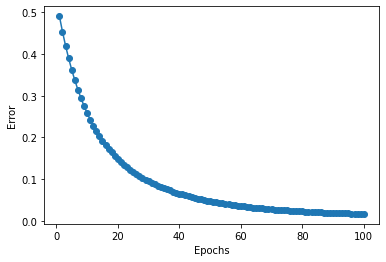

In [4]:
#Plot the error curve
import matplotlib.pyplot as plt
plt.plot(range(1, len(adaline.errors) + 1), adaline.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show();

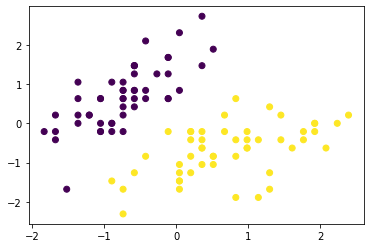

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_std[:, 0], X_std[:, 1], c=y);

#### Train and evaluate the Adaline model

In [71]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=1)

In [110]:
adaline = Adaline(eta=0.01, n_iter=100, random_state=1)
adaline.fit(X_train, y_train);

In [111]:
from sklearn.metrics import classification_report
y_pred = adaline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['versicolor', 'virginica']))

              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00         4
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

